In [71]:
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import diffusion_curvature # our main package
from diffusion_curvature.core import plot_3d, DiffusionMatrix
from diffusion_curvature.laziness import curvature, local_laziness
from diffusion_curvature.datasets import paraboloid
import numpy as np

First, we'll build a saddle region, plot it, and see how the laziness curvature performs

In [73]:
X, ks = paraboloid(1000,1,-1, use_guide_points=True)
plot_3d(X, use_plotly=True)

It's a pringle!

And the code has helpfully given us a "guide point" at the very center of the saddle.

In [74]:
X[0]

array([0., 0., 0.])

Now we'll create a diffusion matrix, and visualize it to make sure a single diffusion covers a reasonable area of the saddle

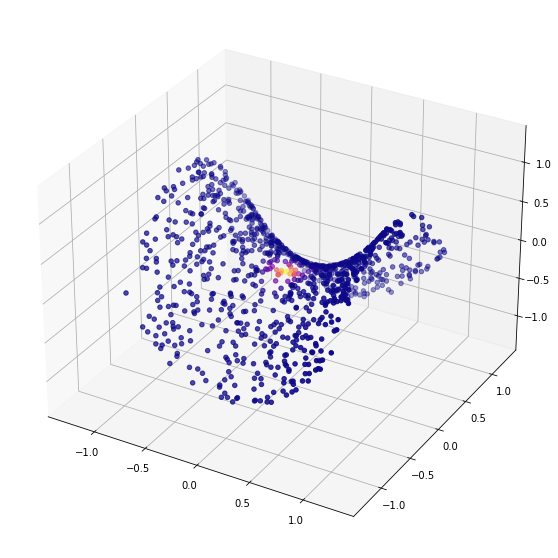

In [75]:
# now to use diffusion curvature
# build a diffusion matrix
P = DiffusionMatrix(X,kernel_type="adaptive",k=7,)
# test by visualizing a single diffusion
plot_3d(X,P[0])

On to the laziness computation

In [76]:
ls = curvature(P, diffusion_powers=8,aperture=10,smoothing=1)
plot_3d(X,ls, "Laziness Curvature on Saddle",colorbar=True,use_plotly=True)

The guide point had curvature

In [77]:
ls[0]

0.08637375630330701

Compared to actual curvature

In [78]:
ks[0]

-4.0

# Comparison across parameters

In [93]:
A = [1,2,3,4,5,6]
B = [-1,-2,-3,-4,-5,-6]
Ks = np.empty((len(A),len(B)))
Ls = np.empty((len(A),len(B)))
for i, a in enumerate(A):
  for j, b in enumerate(B):
    X, ks = paraboloid(10000,a,b, use_guide_points=True)
    P = DiffusionMatrix(X,kernel_type="adaptive",k=7,)
    ls = curvature(P, diffusion_powers=8,aperture=10,smoothing=1)
    Ks[i][j] = ks[0]
    Ls[i][j] = ls[0]

In [94]:
Ks[:,0]

array([-4.        , -1.        , -0.44444444, -0.25      , -0.16      ,
       -0.11111111])

In [95]:
Ls[:,0]

array([0.09268695, 0.09049129, 0.09117413, 0.09922247, 0.09807341,
       0.09416885])

k [-4.00000000e+00 -2.50000000e-01 -4.93827160e-02 -1.56250000e-02
 -6.40000000e-03 -3.08641975e-03]
l [0.09268695 0.08123144 0.08659167 0.07479849 0.09512835 0.08224274]


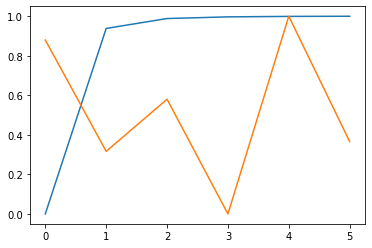

In [96]:
import matplotlib.pyplot as plt
l = np.diag(Ls)
l = l - min(l)
l = l / max(l)
k = np.diag(Ks)
k = k - min(k)
k = k / max(k)
plt.plot(k)
plt.plot(l)
print("k",np.diag(Ks))
print("l",np.diag(Ls))

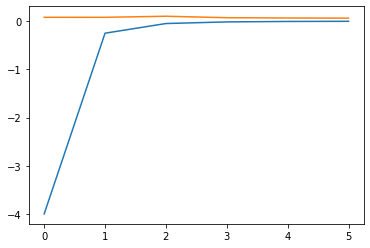

In [82]:
import matplotlib.pyplot as plt
plt.plot(np.diag(Ks))
plt.plot(np.diag(Ls))

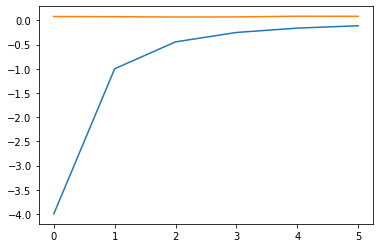

In [83]:
import matplotlib.pyplot as plt
plt.plot(Ks[0,:])
plt.plot(Ls[0,:])

In [84]:
Ks

array([[-4.00000000e+00, -1.00000000e+00, -4.44444444e-01,
        -2.50000000e-01, -1.60000000e-01, -1.11111111e-01],
       [-1.00000000e+00, -2.50000000e-01, -1.11111111e-01,
        -6.25000000e-02, -4.00000000e-02, -2.77777778e-02],
       [-4.44444444e-01, -1.11111111e-01, -4.93827160e-02,
        -2.77777778e-02, -1.77777778e-02, -1.23456790e-02],
       [-2.50000000e-01, -6.25000000e-02, -2.77777778e-02,
        -1.56250000e-02, -1.00000000e-02, -6.94444444e-03],
       [-1.60000000e-01, -4.00000000e-02, -1.77777778e-02,
        -1.00000000e-02, -6.40000000e-03, -4.44444444e-03],
       [-1.11111111e-01, -2.77777778e-02, -1.23456790e-02,
        -6.94444444e-03, -4.44444444e-03, -3.08641975e-03]])

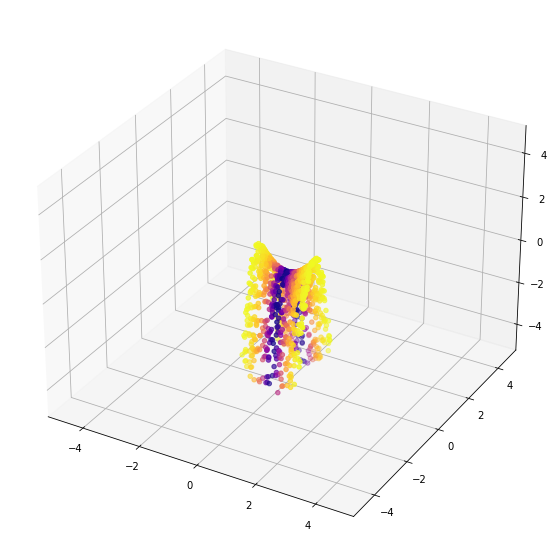

In [85]:
X, ks = paraboloid(1000,1,-5, use_guide_points=True)
P = DiffusionMatrix(X,kernel_type="adaptive",k=7,)
ls = curvature(P, diffusion_powers=8,aperture=10,smoothing=1)
plot_3d(X,ks)